## 1. Encàrrec de productora
<p><img src="https://cdn.pixabay.com/photo/2018/10/09/00/21/netflix-3733812_960_720.jpg" alt="foto pelicula"></p>
<p>Una de les productores més importants del mercat ens ha demant fer un anàlisis històric abans d'invertir en una nova pel·lìcula.</p>
<p>Haurem de donar repsposta a diferents preguntes com: </p>

*   La popularitat de les pel·lícules han disminuït durant els anys
*   Quins gènere tenen millor valoracions
*   Les pel·lícules que ofereixen un millor benefici proporcional son les de més pressupost
*   Quins gèneres ofereixen més benefici.
*   Proposa una idea de pel·lìcula
*   Surt a compte fer una segona part?

<p>Per realitzar aquest anàlisis disposem dels següents set de dades:.</p>

*  movies.p: pel·lìcula data i espectadors
*   movie_to_genres.p: gènere de cada pel·lìcula
*   financial.p: dades econòmiques de cada pel·lìcula
*   sequels.p: relació de les pelìcules i les seves sequeles.
*   ratings.p: valoració de les pel·lìcules




In [146]:
import pandas as pd

#importem dataset i en visualitzem el contigut

financials = pd.read_pickle('financials.p')
moviegenre = pd.read_pickle('movie_to_genres.p')
pelis = pd.read_pickle('movies.p')
ratings = pd.read_pickle('ratings.p')
sequels = pd.read_pickle('sequels.p')
actors = pd.read_csv('actors_movies.csv')

#moviegenre[moviegenre['movie_id'] == 222935]





---



## Anàlisis de la popularitat

L'empresa creu que durant els darrers anys les pel·lícules tenen menys popularitat. Vol que ho comprovem gràficament

Primer de tot importarem el nostre dataset i analitzarem les seves dades bàsiques ¿Quina es la popularitat mitja i la més alta?

In [147]:
#Analitzem el dataset movies, el tipus de les seves variables, el seu tamany i els seus estadístics bàsics
print("Popularitar maxima:",pelis['popularity'].max())
print("Popularitar mitja:",pelis['popularity'].mean())


Popularitar maxima: 875.581305
Popularitar mitja: 21.492300588174075


Necessitem treballar amb el camp release_date com a datatime, així que transformem la columna i ho comprovem. ¿De quin fins a quin any tenim dades?

In [148]:
#Necessitem treballar amb el camp release_date com a datatime, així que creem la columna year i ho comprovem
pelis['release_date']= pd.to_datetime(pelis['release_date'])
pelis.info()


# Observem max i min

print("Data mes antiga:",pelis['release_date'].min())
print("Data mes Nova:",pelis['release_date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            4803 non-null   int64         
 1   title         4803 non-null   object        
 2   popularity    4803 non-null   float64       
 3   release_date  4802 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 150.2+ KB
Data mes antiga: 1916-09-04 00:00:00
Data mes Nova: 2017-02-03 00:00:00


L'empresa considera que els gustos han canviat molt durant els últims anys, aixi que nomès l'interessen les dades desde el 2010. ¿De cuàntes dades disposem? ¿De cuàntes dades disposem?

In [149]:
#Filtrem el nostre dataset

pelis['year'] = pd.DatetimeIndex(pelis['release_date']).year
recuento=pelis.query('year>= 2010')
len(recuento)

1446

Pasem a mostrar la linea temporal de com ha variat la popularitat durant els darrers anys. 

<AxesSubplot:xlabel='year'>

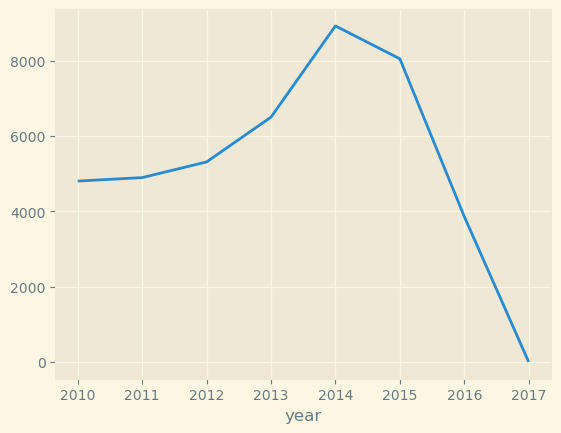

In [150]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

#Agrupem per any i obtenim la suma de la popularitat

popularitatsum=recuento.groupby('year')['popularity'].sum()
#mostre la variació temporal

popularitatsum.plot(x='year',y='popularity',kind='line')


¿Què passa al 2017, quin és el motiu? Igualment aquesta devadalla és molt extranya, és probalble a que en alguns anys s'hagin realitzat moltes més pel·lícules i que per aquesta raó la mitja sigui molt més alta. Anem a fer el mateix procediment amb la mitja

<AxesSubplot:xlabel='year'>

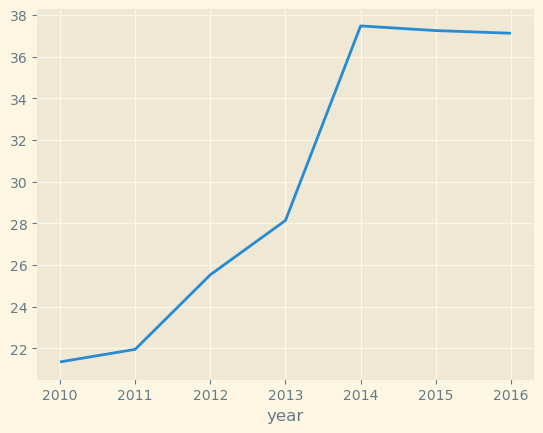

In [151]:
# Agrupem i obtenir la mitja de la popularitat (no tenim en compte 2017)
menys2017=recuento.query('year<2017')
menys2017
popularitatmean=menys2017.groupby('year')['popularity'].mean()


#mostre la variació temporal
popularitatmean.plot(x='year',y='popularity',kind='line')




### Resposta 1. Estan perdent popularitat les pel·lìcules?

No, les pelicules cada cop tenen mes mitja de popularitat igual una mica mica a la baixa.



---



## Anàlisis del rating

Un cop decidit que val la pena realitzar una pel·lìcula, haurem de valorar de quina gènere val la pena en funció de la seva valoració. Primer de tot mostrarem la puntuació mitja de les pel·lícules i les 10 pel·lìcules més valorades. Mostra únicament el nom i el títol de la pel·lìcula ( i el index que surt per defecte)

In [152]:
#Haurem de fer una join entre els dos datasets implicats (recordar que nomès ens interesa pel·lìcules a partir del 2010)
ratingsjunts = pd.merge(pelis, ratings, on="id")
tots2010 = ratingsjunts.query('year>=2010')

# Nomès ens interessa les grans produccions, pel·lìcules amb més de 60k de popularitat i més de 2000 valoracions

populars = tots2010.query('popularity>60 and vote_count>2000')

#Mostrem pel·lìcules
display(populars)


,id,title,popularity,release_date,year,vote_average,vote_count
10,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0
32,27205,Inception,167.583710,2010-07-14,2010.0,8.1,13752.0
77,49026,The Dark Knight Rises,112.312950,2012-07-16,2012.0,7.6,9106.0
120,17578,The Adventures of Tintin,89.938296,2011-10-25,2011.0,6.7,2061.0
224,150689,Cinderella,101.187052,2015-03-12,2015.0,6.7,2374.0
...,...,...,...,...,...,...,...
4723,43074,Ghostbusters,66.218060,2016-07-14,2016.0,5.3,2142.0
4737,82702,How to Train Your Dragon 2,100.213910,2014-06-12,2014.0,7.6,3106.0
4758,210577,Gone Girl,143.041543,2014-10-01,2014.0,7.9,5862.0
4785,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0


De les pel·lìcules que ens interessa pel nostre anàlisis ( més de 60k de popularitat i més de 2000 valoracions) obtindrem el seu gènere per mostra gràficament la mitja per gènere.

In [153]:
#Mirem primer el tamany del nostre dataset filtrar

print(len(populars))

#Realitzem la join
popularsgenere = pd.merge(populars, moviegenre, left_on='id', right_on='movie_id')

display(popularsgenere)
#Mirem el tamany del data set resultant

print(len(popularsgenere))


138


,id,title,popularity,release_date,year,vote_average,vote_count,movie_id,genre
0,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Adventure
1,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Fantasy
2,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Action
3,76757,Jupiter Ascending,85.369080,2015-02-04,2015.0,5.2,2768.0,76757,Science Fiction
4,27205,Inception,167.583710,2010-07-14,2010.0,8.1,13752.0,27205,Mystery
...,...,...,...,...,...,...,...,...,...
418,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0,82690,Comedy
419,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0,82690,Adventure
420,82690,Wreck-It Ralph,62.341073,2012-11-01,2012.0,7.1,4570.0,82690,Family
421,64682,The Great Gatsby,61.196071,2013-05-10,2013.0,7.3,3769.0,64682,Romance


423


¿Quin és el motiu que els tamany dels dataset siguin diferents?

<AxesSubplot:>

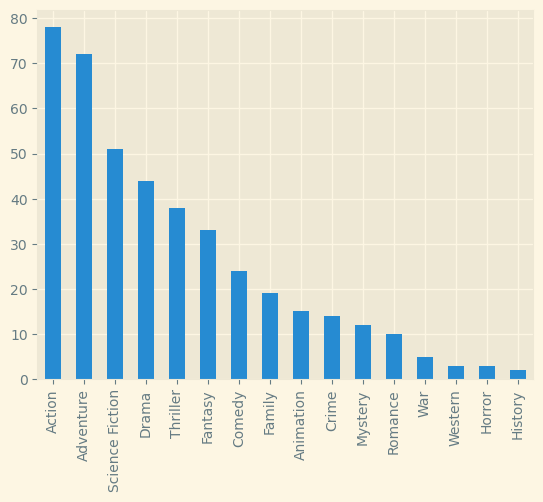

In [154]:
#Mostrem gràfic de barres per gènere
graficgeneres=popularsgenere['genre'].value_counts()

graficgeneres.plot(kind='bar')

¿Quins son el tres gèneres amb millor valoració?

In [155]:
# Mostrem gènres amb millor valoració
valorgenres=popularsgenere.groupby('genre')['vote_average'].mean()
valorgenresordenats=valorgenres.sort_values(ascending=False)
print(valorgenresordenats.head(3))

genre
History    7.950000
Western    7.566667
Drama      7.238636
Name: vote_average, dtype: float64




---



## Anàlisis econòmic

Observa el dataset financial i els seus estadìstics bàsics. ¿Quin és el pressupost i els ingressos promig?¿Sembla rentable fer una pel·lìcula?

In [156]:
#Observem dataset financials

mitjapresupost=financials["budget"].mean()

mitjarevenue = financials["revenue"].mean()

print ("Mitja presupost: ",mitjapresupost, " Mitja ingresos: ",mitjarevenue)

print(" Per lo tant la mitja de beneficis es: ", mitjarevenue-mitjapresupost," Aixi que si que sembla rentable")

Mitja presupost:  40654444.774233505  Mitja ingresos:  121242957.26138124
 Per lo tant la mitja de beneficis es:  80588512.48714773  Aixi que si que sembla rentable


Mostra la distribució (histograma) del pressupost de les pel·lícules. ¿La majoria de pel·lìcules son de baix o alt pressupost?

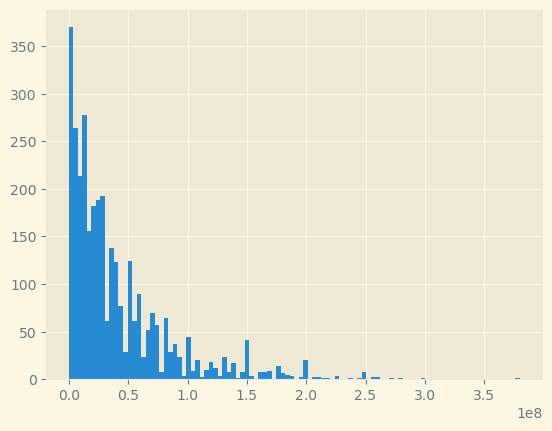

In [157]:
# Histograma

hist = financials['budget'].hist(bins=100)

#La majoria son de baix presupost

Volem mostrar ( nom inclòs) les pel·lìcules les 5 pel·lícules mès profitosses i les 5 més deficitàries de la historia.

In [158]:
#Calculmen la columna profit

pelisfinances = pd.merge(pelis, financials, left_on='id', right_on='id')

pelisfinances['profit'] = pelisfinances['revenue'] - pelisfinances['budget']

pelisfinances = pelisfinances.sort_values(by=['profit'],ascending=False)

#Mostrem 5 millors i 5 pitjors

profitoses = pelisfinances.head(5)
deficitaries = pelisfinances.tail(5)

print(profitoses)
print(deficitaries)


          id           title  popularity release_date    year     budget  \
20     19995          Avatar  150.437577   2009-12-10  2009.0  237000000   
2473     597         Titanic  100.025899   1997-11-18  1997.0  200000000   
1241  135397  Jurassic World  418.708552   2015-06-09  2015.0  150000000   
977   168259       Furious 7  102.322217   2015-04-01  2015.0  190000000   
414    24428    The Avengers  144.448633   2012-04-25  2012.0  220000000   

           revenue        profit  
20    2.787965e+09  2.550965e+09  
2473  1.845034e+09  1.645034e+09  
1241  1.513529e+09  1.363529e+09  
977   1.506249e+09  1.316249e+09  
414   1.519558e+09  1.299558e+09  
         id                         title  popularity release_date    year  \
1805  11692  The Adventures of Pluto Nash   12.092241   2002-08-15  2002.0   
3213   1911              The 13th Warrior   27.220157   1999-08-27  1999.0   
1498  50321               Mars Needs Moms   12.362599   2011-03-09  2011.0   
206   10733          

Ens tornem a centrar en les pel·lìcules que interessen a la productora ( > 2010 i amb alt grau de popularitat). Per fer una bona inversió no només ens interessa en el indicador 'profit' sino també el 'prop_profit' la proporció entre els beneficis i la quantitat que s'ha invertit en realizat la película. Quines son les 5 pel·lícules que porporcionalment han generat més benefici? Quines conclusions extreure comparant-les amb el llistat anterior?

In [159]:
# Fem un innerjoin amb el dataset filtrat anterior
mergedpopulars =pd.merge(pelisfinances, popularsgenere, on='id', how='inner')
mergedpopulars = mergedpopulars.drop_duplicates()
#Crear nova columna
mergedpopulars['prop_profit'] = mergedpopulars['profit'] / mergedpopulars['budget']

#Mostrar llistat
ordenatsproporcio=mergedpopulars.sort_values('prop_profit',ascending=False)
ordenatsproporcio2=ordenatsproporcio.head(5)
ordenatsproporcio2

,id,title_x,popularity_x,release_date_x,year_x,budget,revenue,profit,title_y,popularity_y,release_date_y,year_y,vote_average,vote_count,movie_id,genre,prop_profit
239,222935,The Fault in Our Stars,74.358971,2014-05-16,2014.0,12000000,307166834.0,295166834.0,The Fault in Our Stars,74.358971,2014-05-16,2014.0,7.6,3759.0,222935,Drama,24.597236
238,222935,The Fault in Our Stars,74.358971,2014-05-16,2014.0,12000000,307166834.0,295166834.0,The Fault in Our Stars,74.358971,2014-05-16,2014.0,7.6,3759.0,222935,Romance,24.597236
220,44214,Black Swan,91.285683,2010-12-02,2010.0,13000000,327803731.0,314803731.0,Black Swan,91.285683,2010-12-02,2010.0,7.3,4430.0,44214,Drama,24.215672
221,44214,Black Swan,91.285683,2010-12-02,2010.0,13000000,327803731.0,314803731.0,Black Swan,91.285683,2010-12-02,2010.0,7.3,4430.0,44214,Thriller,24.215672
284,205596,The Imitation Game,145.364591,2014-11-14,2014.0,14000000,233555708.0,219555708.0,The Imitation Game,145.364591,2014-11-14,2014.0,8.0,5723.0,205596,Drama,15.682551


No tenim clar si és convenient realitzar una pel·lícula d'alt o baix pressupost, per aquesta raó anem a comparar si existeix una correlació entre el pressupost i el pro_profit guanyat. Podriem mostra una matriu de correlació, pero preferim extreu conclusions visuals a través d'un scatter plot. Et dona la sensació que si s'inverteixen més diner la proporció de benefici és més gran?

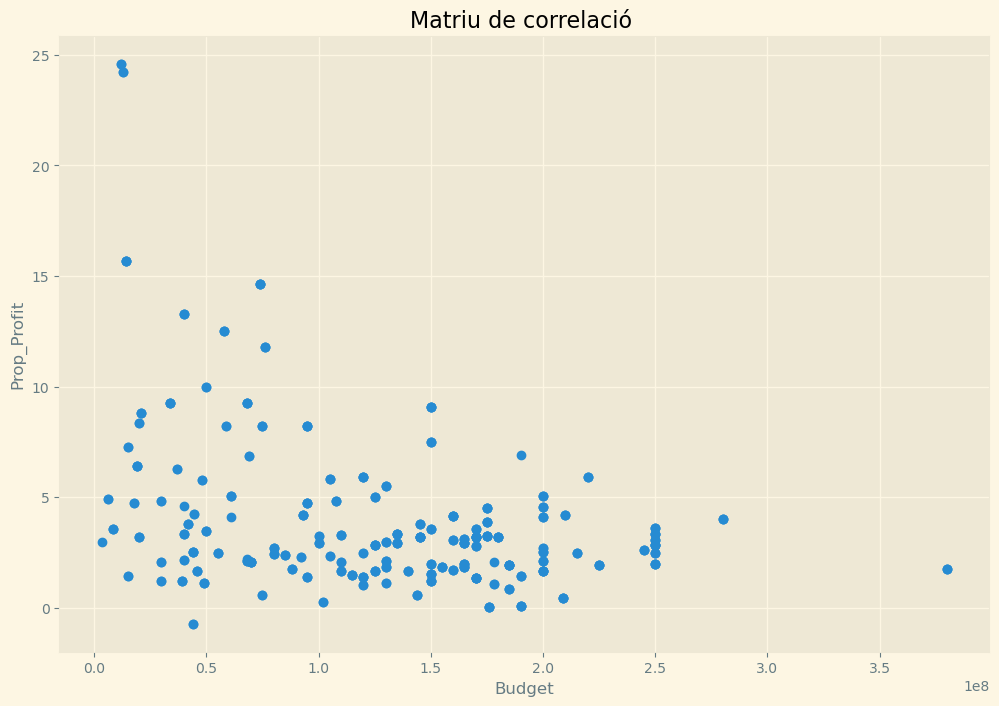

In [160]:
#Scatter plot
# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))



# Create a title and axis labels
plt.scatter(ordenatsproporcio['budget'],ordenatsproporcio['prop_profit'])

plt.title('Matriu de correlació ')
plt.ylabel('Prop_Profit')
plt.xlabel('Budget')
# Show the plot
plt.show()


En la mateixa gràfica anem incloure les valoracions de les pel·lìcules, aparentment imaginem que les pel·lìcules que han tingut bona acollida son les que mé beneficis han aportat. Veient la gràfica creada sembla certa aquesta afirmaciò?

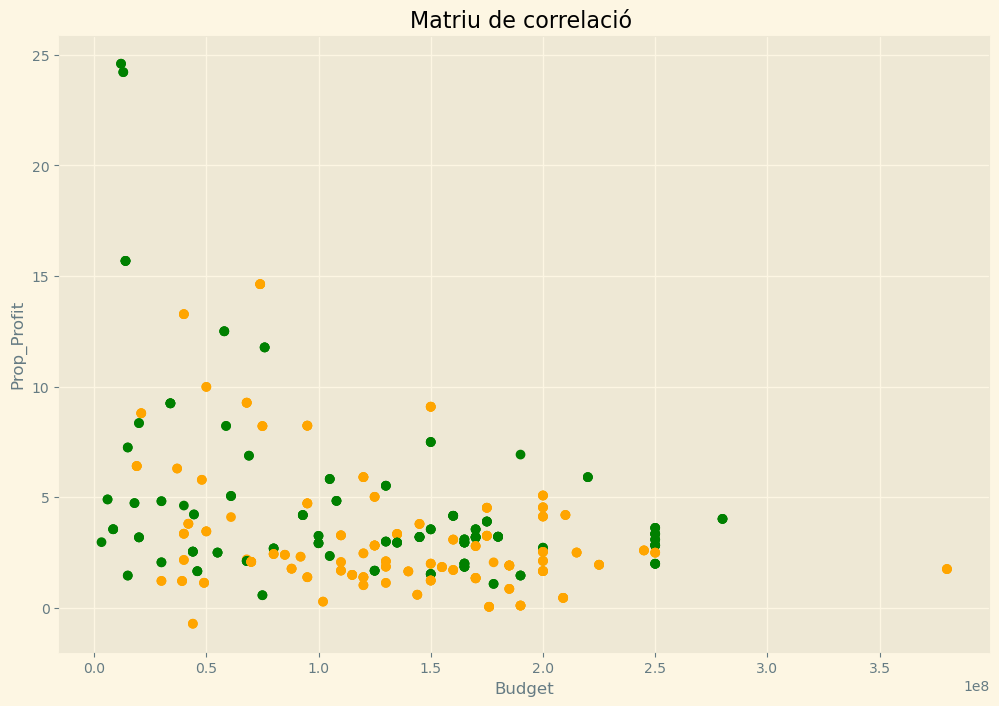

In [161]:
#Hem de crear una llista de color per cada pel·lìcula
colors=[]

# Iteració sobre cada fila del dataset, si vote_average >= 7 --> verd / >=5 taronja /5 vermell
for key, peli in ordenatsproporcio.iterrows():
  if peli['vote_average'] >=7:
    colors.append("green")
  elif peli['vote_average'] >=5:
    colors.append("orange")
  else:
    colors.append("red")

#Crea de nou la gràfica amb l'opció color
plt.style.use('Solarize_Light2')

# Set the figure style and initalize a new figure
fig = plt.figure(figsize=(12,8))

plt.scatter(ordenatsproporcio['budget'],ordenatsproporcio['prop_profit'],c= colors )


# Create a title and axis labels
plt.title('Matriu de correlació ')
plt.ylabel('Prop_Profit')
plt.xlabel('Budget')

# Show the plot
plt.show()


    

Finalment per determinar quina tipus de pel·lìcula realitzarem visualitzarem els gèneres que ofereixen millor relació en quant a proporció de benefici. Mirant l'apartat anterior i aquest, quin seria els gèneres de la teva pel·lìcula? Fica imagina i proposa una temàtica. 

<AxesSubplot:xlabel='genre'>

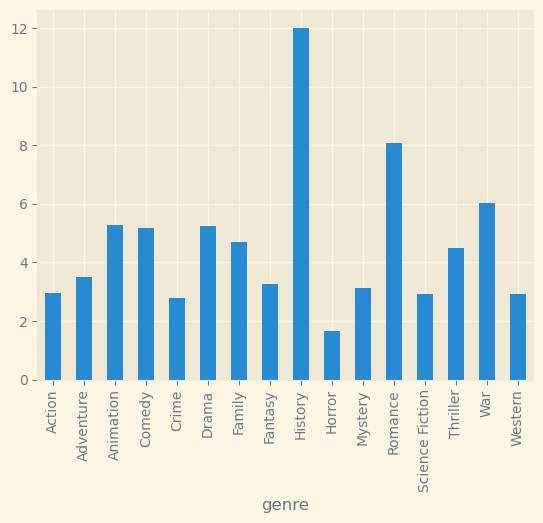

In [162]:

#Mostrem gràfic de barres per gènere
graficgeneres2=ordenatsproporcio.groupby('genre')['prop_profit'].mean()

graficgeneres2.plot(kind='bar')


In [163]:
# Mostrem gèneres i proposem temàtica
llistageneres=ordenatsproporcio.groupby('genre')['prop_profit'].mean()
llistageneres.sort_values( ascending=False)

genre
History            12.016275
Romance             8.061110
War                 6.033667
Animation           5.276962
Drama               5.235562
Comedy              5.161365
Family              4.681907
Thriller            4.506611
Adventure           3.488449
Fantasy             3.273246
Mystery             3.120862
Action              2.971595
Western             2.913822
Science Fiction     2.913254
Crime               2.786783
Horror              1.651505
Name: prop_profit, dtype: float64

Habria que escojer la tematica de historia y romance y guerra, podriamos hacer una pelicula sobre como hitler se enamora de una chica Judía y esta le pone los cuernos de forma descarada desencadenando asi el holocausto

## 'Segundas partes no son buenas'

La nostra pel·lìcula ha tingut molt bona acollida tant que estem valorant la possibilitat de realitzar una segona part. Existeix la idea de que les seqüeles son sempre pitjors. Mostra la diferència promig entre les pel·lìcules i les seves seqüeles i les 5 pel·lìcules on les seves continuacions han millorat mès.

In [164]:
# mostrem dataset
print(sequels)

# Elimina files que no tenen sequel

secuelas=sequels.dropna(axis=0)

# comprova que no hi ha NA

print(secuelas)
# join amb movies per obtenir noms de original i de sequels

ambsecuelas = pd.merge(secuelas, pelis, left_on='sequel', right_on='id')

ambsecuelas
# simplifiquem per quedar-nos únicament amb id_original, titol_original, id_sequel, titol_sequel

ambsecuelasfinal = ambsecuelas.drop(columns=['popularity', 'release_date', 'year','id_y'])
ambsecuelasfinal = ambsecuelasfinal.rename(columns={"id_x": "id_original", "title_x": "titol_original", "sequel": "id_sequel", "title_y": "titol_sequel"})
ambsecuelasfinal

          id                             title  sequel
0      19995                            Avatar    <NA>
1        862                         Toy Story     863
2        863                       Toy Story 2   10193
3        597                           Titanic    <NA>
4      24428                      The Avengers    <NA>
...      ...                               ...     ...
4798  133931                          Zambezia    <NA>
4799  309503                            Zipper    <NA>
4800   34592  ZMD: Zombies of Mass Destruction    <NA>
4801  206213                     Zombie Hunter    <NA>
4802  185567                              Zulu    <NA>

[4803 rows x 3 columns]
         id                                              title  sequel
1       862                                          Toy Story     863
2       863                                        Toy Story 2   10193
30      675          Harry Potter and the Order of the Phoenix     767
32      121              The Lo

,id_original,titol_original,id_sequel,titol_sequel
0,862,Toy Story,863,Toy Story 2
1,863,Toy Story 2,10193,Toy Story 3
2,675,Harry Potter and the Order of the Phoenix,767,Harry Potter and the Half-Blood Prince
3,121,The Lord of the Rings: The Two Towers,122,The Lord of the Rings: The Return of the King
4,120,The Lord of the Rings: The Fellowship of the Ring,121,The Lord of the Rings: The Two Towers
...,...,...,...,...
85,76,Before Sunrise,80,Before Sunset
86,2292,Clerks,2295,Clerks II
87,9367,El Mariachi,8068,Desperado
88,8374,The Boondock Saints,22821,The Boondock Saints II: All Saints Day


In [165]:
# Merge per duplicat per obentenir les valoracions
valoracionssecuelas = pd.merge(ambsecuelasfinal, ratings, left_on='id_original', right_on='id')
valoracionssecuelas = pd.merge(valoracionssecuelas, ratings, left_on='id_sequel', right_on='id')

valoracionssecuelas

# creem nova columna amb la diferenta valoracació sequel i original
valoracionssecuelas = valoracionssecuelas.drop(columns=['id_x', 'id_y','vote_count_x','vote_count_y'])
valoracionssecuelas = valoracionssecuelas.rename(columns={"vote_average_x": "valoracio_original", "vote_average_y": "valoracio_secuela"})

valoracionssecuelas

valoracionssecuelas['diferencianota']= valoracionssecuelas['valoracio_secuela']-valoracionssecuelas['valoracio_original']

valoracionssecuelas
#mostre mitja

mitjaoriginal2= valoracionssecuelas["valoracio_original"].mean()

mitjaosecuelas2= valoracionssecuelas["valoracio_secuela"].mean()
mitjadiferencia2= valoracionssecuelas["diferencianota"].mean()

print("La mitja de les originals es: ",mitjaoriginal2, " la mitja de les secuelas es: ",mitjaosecuelas2," I la mitja de la diferencia es : ",mitjadiferencia2)



La mitja de les originals es:  6.784444444444444  la mitja de les secuelas es:  6.583333333333333  I la mitja de la diferencia es :  -0.20111111111111105


El que podem veure es que de mitja les originals son millors que les secuelas

In [166]:
# Mostra les 5 millor sequeles en comparació a la seva predecesora

ordenatsecuelas= valoracionssecuelas.sort_values(by='diferencianota', ascending=False)
ordenatsecuelas.head(5)

,id_original,titol_original,id_sequel,titol_sequel,valoracio_original,valoracio_secuela,diferencianota
74,9355,Mad Max Beyond Thunderdome,76341,Mad Max: Fury Road,5.9,7.2,1.3
27,1771,Captain America: The First Avenger,100402,Captain America: The Winter Soldier,6.6,7.6,1.0
82,10676,Halloween III: Season of the Witch,11357,Halloween 4: The Return of Michael Myers,5.0,5.9,0.9
14,10764,Quantum of Solace,37724,Skyfall,6.1,6.9,0.8
28,331,Jurassic Park III,135397,Jurassic World,5.7,6.5,0.8




---



## UPGRADE - CASTING


A partir del dataset actors, fes l'anàlisis que consideris adient per escollir els nostres actors/actrius

Lo que tendriamos que hacer es mirar para las pelis de romance-guerra-historia mirar que actores son los que han hecho peliculas con mejor prop_beneficio / populares i a partir de alli escojer, lo que parece que no tenemos datos de actores de guerra-historia-romance

In [179]:
actors

pelisactors = pd.merge(actors,pelis, left_on='Title',right_on='title')
pelisactors2=pelisactors.assign(Actor=pelisactors.Actor.str.split(",")).explode('Actor')
pelisactors2['Actor'] = pelisactors2['Actor'].str.replace('[', '')
pelisactors2['Actor'] = pelisactors2['Actor'].str.replace(']', '')

pelisactors2

popularitatautor = pelisactors2.groupby('Actor')['popularity'].mean()
popularitatautor.sort_values(ascending=False) #Actors mes populars

pelisactors2

proporcionsactors = pd.merge(pelisactors2,ordenatsproporcio, on="id")

proporcionsactors

proporcionsactorsnostre = proporcionsactors.query('genre in ["History","Romance","War"]')
proporcionsactorsnostre





C:\Users\edmon\AppData\Local\Temp\ipykernel_29832\2401348892.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pelisactors2['Actor'] = pelisactors2['Actor'].str.replace('[', '')
C:\Users\edmon\AppData\Local\Temp\ipykernel_29832\2401348892.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pelisactors2['Actor'] = pelisactors2['Actor'].str.replace(']', '')


,Actor,Title,id,title,popularity,release_date,year,title_x,popularity_x,release_date_x,...,profit,title_y,popularity_y,release_date_y,year_y,vote_average,vote_count,movie_id,genre,prop_profit
